In [ ]:
%matplotlib inline


Plotting with CartoPy and GeoPandas
-----------------------------------

Converting between GeoPandas and CartoPy for visualizing data.

`CartoPy <http://scitools.org.uk/cartopy/>`_ is a Python library
that specializes in creating geospatial
visualizations. It has a slightly different way of representing
Coordinate Reference Systems (CRS) as well as constructing plots.
This example steps through a round-trip transfer of data
between GeoPandas and CartoPy.

First we'll load in the data using GeoPandas.


In [6]:
# sphinx_gallery_thumbnail_number = 7
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

First we'll visualize the map using GeoPandas



In [16]:
df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_pp
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.002791
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001503
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.056823
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.014316
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.016512
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.009756
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.035766


Plotting with CartoPy
=====================

Cartopy also handles Shapely objects well, but it uses a different system for
CRS. To plot this data with CartoPy, we'll first need to project it into a
new CRS. We'll use a CRS defined within CartoPy and use the GeoPandas
``to_crs`` method to make the transformation.



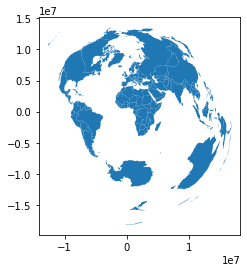

In [8]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

Now that our data is in a CRS based off of CartoPy, we can easily
plot it.



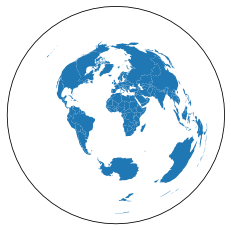

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
ax.add_geometries(df_ae['geometry'], crs=crs)

Note that we could have easily done this with an EPSG code like so:



In [10]:
crs_epsg = ccrs.epsg('3857')
df_epsg = df.to_crs(epsg='3857')

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': crs_epsg},
                        figsize=(10, 5))
# Make the CartoPy plot
axs[0].add_geometries(df_epsg['geometry'], crs=crs_epsg,
                      facecolor='white', edgecolor='black')
# Make the GeoPandas plot
df_epsg.plot(ax=axs[1], color='white', edgecolor='black')

ModuleNotFoundError: No module named 'pyepsg'

CartoPy to GeoPandas
====================

Next we'll perform a CRS projection in CartoPy, and then convert it
back into a GeoPandas object.



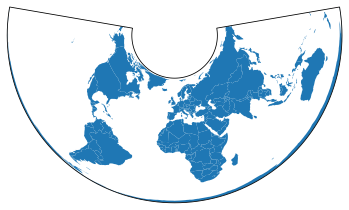

In [15]:
crs_new = ccrs.AlbersEqualArea()
new_geometries = [crs_new.project_geometry(ii, src_crs=crs)
                  for ii in df_ae['geometry'].values]

fig, ax = plt.subplots(subplot_kw={'projection': crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

Now that we've created new Shapely objects with the CartoPy CRS,
we can use this to create a GeoDataFrame.



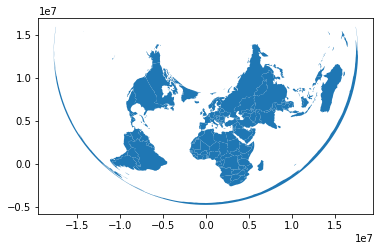

In [12]:
df_aea = geopandas.GeoDataFrame(df['gdp_pp'], geometry=new_geometries,
                                crs=crs_new.proj4_init)
df_aea.plot()

We can even combine these into the same figure. Here we'll plot the
shapes of the countries with CartoPy. We'll then calculate the centroid
of each with GeoPandas and plot it on top.



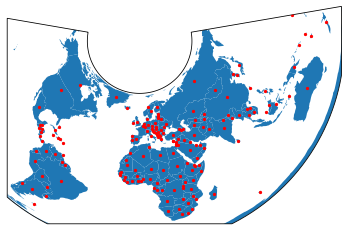

In [13]:
# Generate a CartoPy figure and add the countries to it
fig, ax = plt.subplots(subplot_kw={'projection': crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

# Calculate centroids and plot
df_aea_centroids = df_aea.geometry.centroid
# Need to provide "zorder" to ensure the points are plotted above the polygons
df_aea_centroids.plot(ax=ax, markersize=5, color='r', zorder=10)

plt.show()

In [18]:
12 * 0.6 +19.5 *0.4

15.0